In [1]:
# Importing the requierd libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [2]:
# Reading the csv file
df = pd.read_csv('Diamond_Price_Prediction.csv')

In [3]:
df

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df = df.drop("id", axis=1)

In [5]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
# shape of the data
df.shape

(53940, 10)

In [7]:
# top 5 rows of the data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# last 5 rows of the data
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
# Descriptive statistics of the data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
# Duplicate values in data
df.duplicated().sum()

146

In [12]:
df = df.drop_duplicates()

In [13]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
# Missing values check by using list comprehension
[feature for feature in df.columns if df[feature].isnull().sum()]

[]

## Numerical Feature

In [15]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != "O" ]

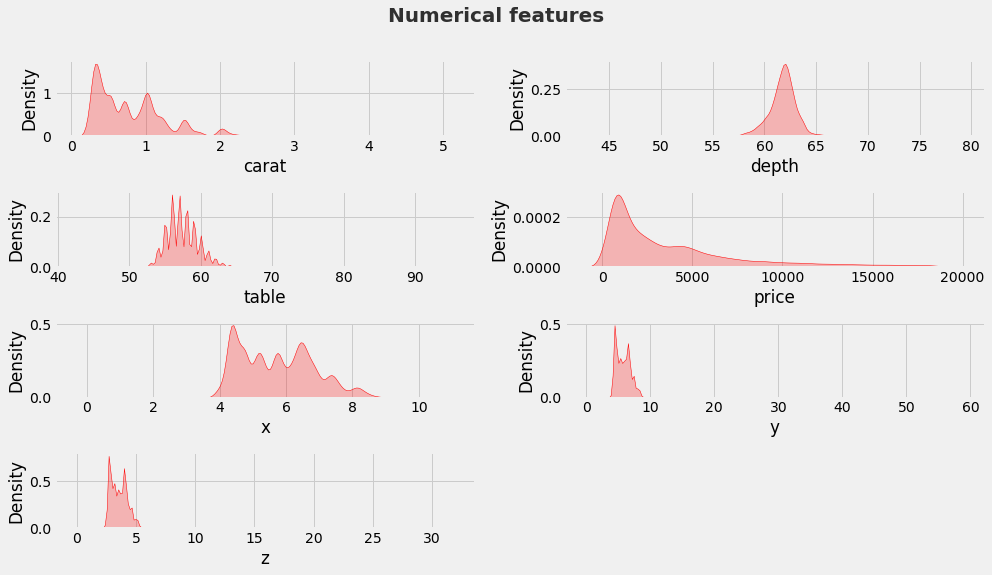

In [16]:
plt.figure(figsize=(14,8))
plt.suptitle('Numerical features',fontsize=20, fontweight = 'bold', alpha=0.8,y=1)
for i in range(0, len(numerical_feature)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[numerical_feature[i]],shade=True,color='red')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

## Categorical Features

In [17]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

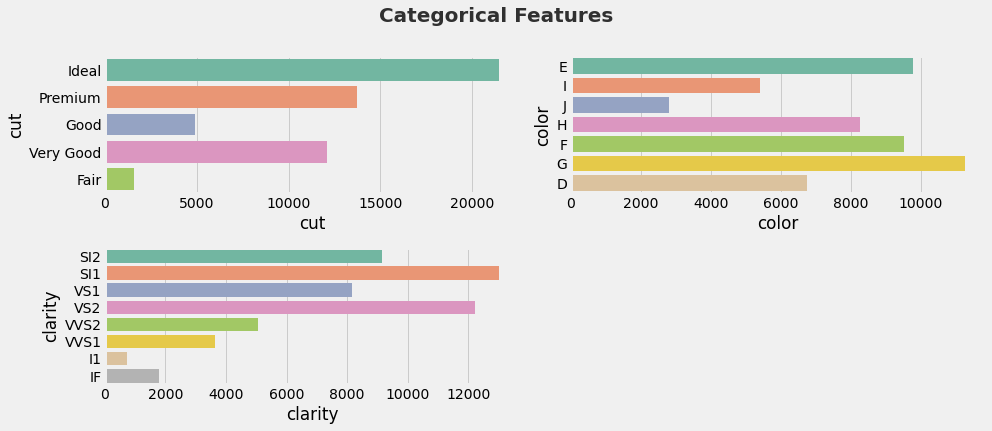

In [18]:
plt.figure(figsize=(14,6))
plt.suptitle('Categorical Features',fontsize=20, fontweight = 'bold', alpha=0.8,y=1)

for i in range(0, len(categorical_feature)):
    plt.subplot(2,2,i+1)
    sns.countplot(y=df[categorical_feature[i]],palette="Set2")
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()

## Correlation Matrix

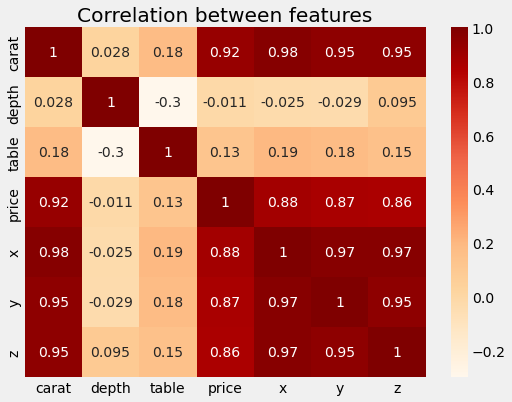

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap="OrRd", annot=True)
plt.title("Correlation between features")
plt.show()

- There is multicollinearity issue in the data x, y and z are highly correlated with each other.

## Carat

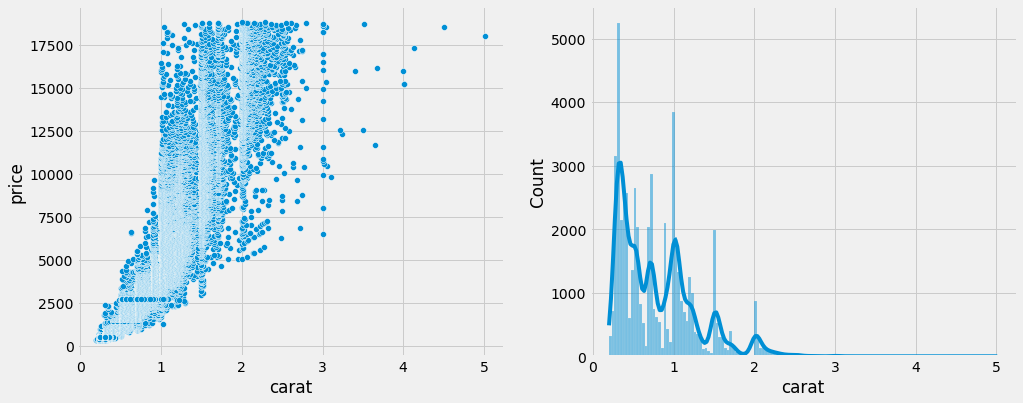

In [20]:
# carat and price column analysis
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.scatterplot(data=df,x='carat',y='price',ax=ax1)
sns.histplot(data=df,x='carat',kde=True,ax=ax2)
fig.set_size_inches(15,6)
plt.show()

## Cut

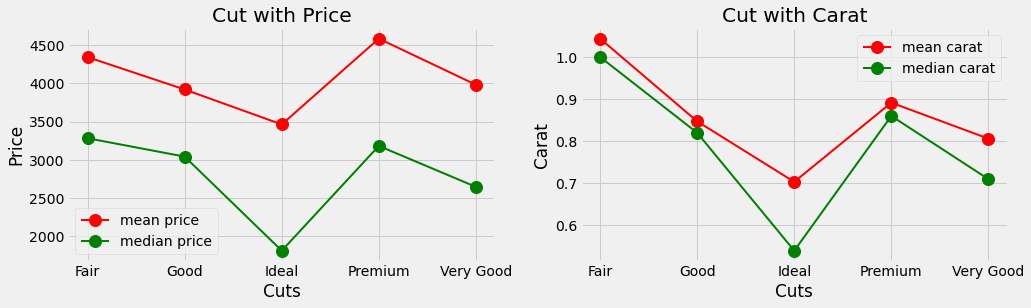

In [21]:
df1 = df.groupby(['cut']).mean().reset_index()
df2 = df.groupby(['cut']).median().reset_index()
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(df1['cut'],df1['price'] , 'go-', linewidth=2, markersize=12, c='red',label='mean price')
plt.plot(df2['cut'],df2['price'],'go-', linewidth=2, markersize=12, label="median price")
plt.title("Cut with Price")
plt.xlabel("Cuts")
plt.ylabel("Price")
plt.legend()

plt.subplot(1,2,2)
plt.plot(df1['cut'],df1['carat'] , 'go-', linewidth=2, markersize=12, c='red',label='mean carat')
plt.plot(df2['cut'],df2['carat'],'go-', linewidth=2, markersize=12, label="median carat")
plt.title("Cut with Carat")
plt.xlabel("Cuts")
plt.ylabel("Carat")
plt.legend()
plt.show()

## Color

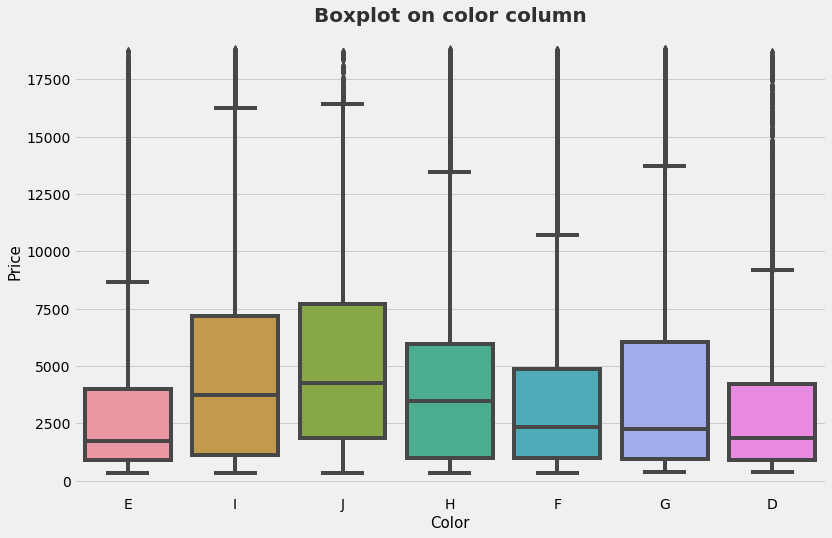

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['color'],y=df['price'])
plt.title("Boxplot on color column",fontsize=20, fontweight = 'bold', alpha=0.8,y=1)
plt.xlabel("Color",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

## Clarity

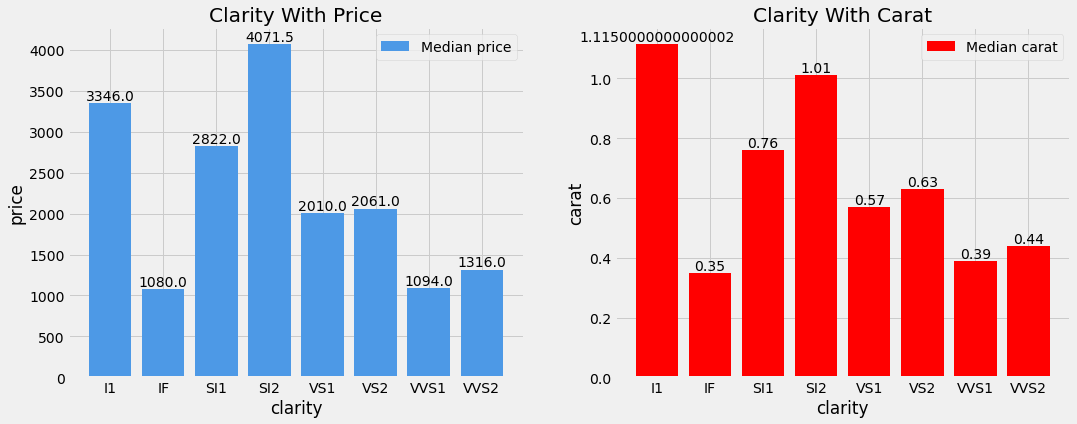

In [24]:
df1 = df.groupby(['clarity']).median().reset_index()
clarity = df1['clarity']
price = df1['price']
carat = df1['carat']

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
bars1 = ax1.bar(clarity,price,label="Median price",color=(0.3, 0.6, 0.9))
ax1.set_title('Clarity With Price')
ax1.set_xlabel("clarity")
ax1.set_ylabel("price")

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
ax1.legend()
bars2 = ax2.bar(clarity,carat,label="Median carat",color='red')
ax2.set_title('Clarity With Carat')
ax2.set_xlabel("clarity")
ax2.set_ylabel("carat")

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
ax2.legend()
plt.show()

## Depth & Table

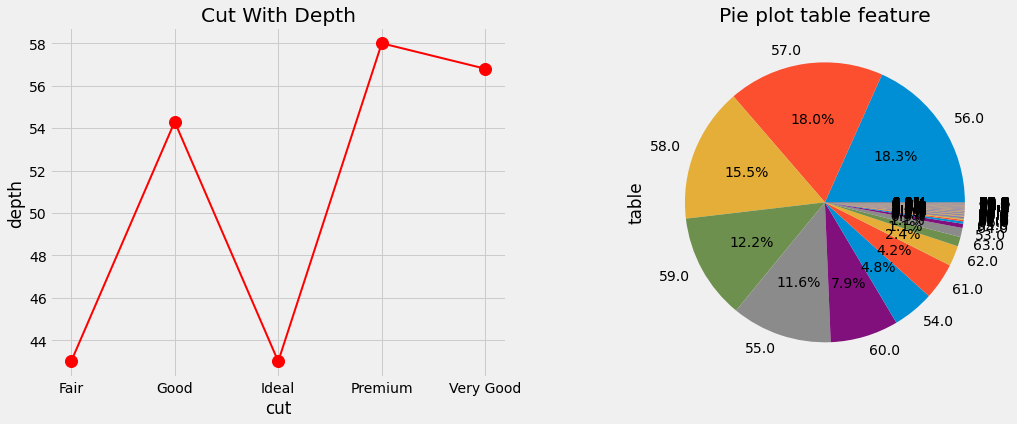

In [25]:
df1 = df.groupby(['cut']).min().reset_index()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

ax1.plot(df1['cut'],df1['depth'],'go-', linewidth=2, markersize=12,c='red')
ax1.set_title('Cut With Depth')
ax1.set_xlabel("cut")
ax1.set_ylabel("depth")
df['table'].value_counts().plot.pie(y=df['table'].value_counts().to_list()[:5],startangle=0,
autopct='%1.1f%%',textprops={'fontsize':14})
ax2.set_title('Pie plot table feature')
plt.show()